In [4]:
import pandas as pd

In [5]:
vins = pd.read_csv("adult_data/visual_neuron_positions.csv")

In [6]:
left = vins[vins["side"] == "left"]
right = vins[vins["side"] == "right"]

In [39]:
import plotly.express as px
fig = px.scatter_3d(right, x='x', y='y', z='z', color='cell_type')
fig.show()

In [53]:
# filter right according to:
#    y > 225000 & y < 327400
#    z > 75000 & z < 177400

right_filtered = right[(right["y"] >= 225000) & (right["y"] < 327400) & (right["z"] >= 75000) & (right["z"] < 177400)]
# convert coordinates to 0-512
right_filtered["y"] = (right_filtered["y"] - 225000) / 102400 * 512
right_filtered["z"] = (right_filtered["z"] - 75000) / 102400 * 512

/tmp/ipykernel_67054/3630444797.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_67054/3630444797.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
# filter right according to:
#    y > 225000 & y < 327400
#    z > 75000 & z < 177400

# convert coordinates to 0-512import plotly.express as px
right["y"] = (right["y"] - 225000) / 102400 * 512
right["z"] = (right["z"] - 75000) / 102400 * 512

/tmp/ipykernel_519516/1121948694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right["y"] = (right["y"] - 225000) / 102400 * 512
/tmp/ipykernel_519516/1121948694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right["z"] = (right["z"] - 75000) / 102400 * 512


In [9]:
# 2d scatter of the y and z coordinates of the right side
import plotly.express as px

fig = px.scatter(right, x="y", y="z", color="cell_type")
fig.show()

In [55]:
# get n_points / 8 random centers in this image
n_points = len(right_filtered)
n_centers = n_points // 8
centers = right_filtered.sample(n_centers)

In [56]:
from scipy.spatial import cKDTree, Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
# get voronoi cells for these centers
tree = cKDTree(centers[["y", "z"]].values)
_, indices = tree.query(right_filtered[["y", "z"]].values)

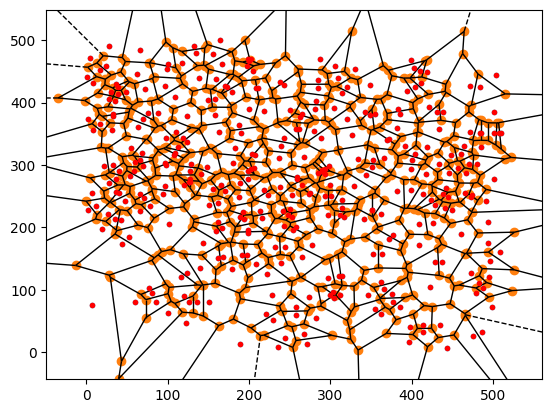

In [57]:
# Create Voronoi Diagram
rand_points = centers[["y", "z"]].values
vor = Voronoi(rand_points)

# Plot Voronoi diagram (optional, for visualization)
voronoi_plot_2d(vor)
plt.plot(rand_points[:, 0], rand_points[:, 1], "r.")
plt.show()

In [60]:
right_filtered.to_csv("adult_data/right_filtered.csv", index=False)

In [13]:
right.drop_duplicates("root_id")["cell_type"].value_counts()

R1-6    3968
R7       657
R8       646
Name: cell_type, dtype: int64

In [14]:
right

,root_id,cell_type,side,x,y,z
3,7.205759e+17,R1-6,right,817438.400000,-12.552000,402.880000
6,7.205759e+17,R1-6,right,876692.000000,410.000000,337.600000
7,7.205759e+17,R1-6,right,811240.000000,105.440000,80.600000
8,7.205759e+17,R8,right,848432.000000,437.220000,80.600000
10,7.205759e+17,R1-6,right,375732.800000,375.628000,523.040000
...,...,...,...,...,...,...
11112,7.205759e+17,R1-6,right,868076.000000,370.700000,249.600000
11113,7.205759e+17,R1-6,right,671917.333333,263.873333,496.866667
11114,7.205759e+17,R1-6,right,819244.000000,120.370000,90.800000
11117,7.205759e+17,R1-6,right,828514.000000,428.050000,213.600000
